In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm

In [2]:
df = pd.read_excel("Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
furniture = df.loc[df['Category'] == 'Furniture']

In [4]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

### Data Processing

In [5]:
furniture = furniture.filter(['Order Date', 'Sales'])

In [6]:
furniture.shape

(2121, 2)

In [7]:
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [8]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [9]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [10]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [11]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [12]:
# The above datatime data can be tricky to work with, 
# therefore, we will use the average daily sales value for that 
# month instead, and we are using the start of each month
# as the timestamp.

In [13]:
y = furniture['Sales'].resample('MS').mean()

In [14]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

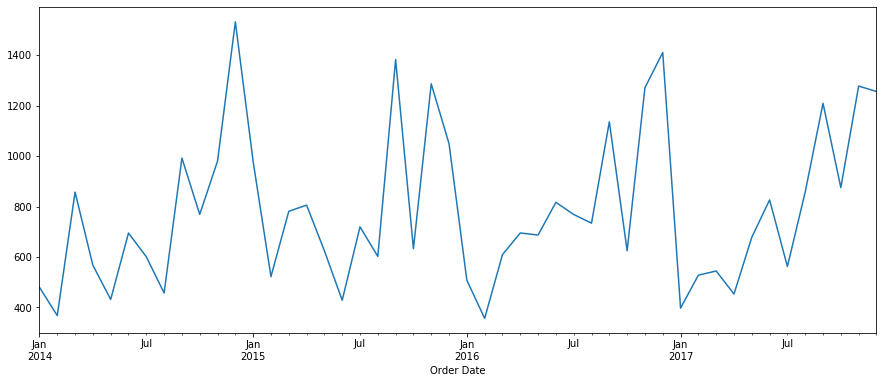

In [15]:
y.plot(figsize=(15, 6))
plt.show()

In [16]:
# The above time series plot has seasonality pattern.
# The sales are always low at the beginning of the year and
# high at the end of the year.

In [17]:
# We can also visualize our data using a method called
# time-series decomposition that allows us to decompose our time 
# series into three distinct components: 
# trend, seasonal, residual

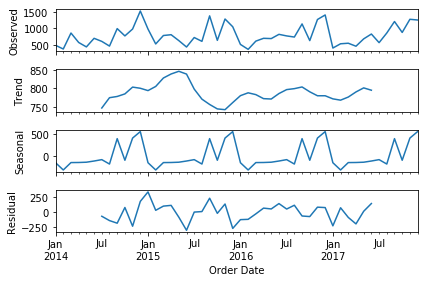

In [18]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [19]:
# Above plot clearly shows that the sales in furniture is 
# unstable, along with its obvious seasonality.

### Time Series forcasting with ARIMA

In [20]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in 
                pdq]

print("Examples of parameter combinations for seasonal ARIMA...")

print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [21]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p,d,q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [22]:
for i in range(0,8):
    print('pdq: {} seasonal_pdq{}'.format(pdq[i], seasonal_pdq[i]))

pdq: (0, 0, 0) seasonal_pdq(0, 0, 0, 12)
pdq: (0, 0, 1) seasonal_pdq(0, 0, 1, 12)
pdq: (0, 1, 0) seasonal_pdq(0, 1, 0, 12)
pdq: (0, 1, 1) seasonal_pdq(0, 1, 1, 12)
pdq: (1, 0, 0) seasonal_pdq(1, 0, 0, 12)
pdq: (1, 0, 1) seasonal_pdq(1, 0, 1, 12)
pdq: (1, 1, 0) seasonal_pdq(1, 1, 0, 12)
pdq: (1, 1, 1) seasonal_pdq(1, 1, 1, 12)


In [23]:
# Next step s parameter selection for our furniture's sales
# ARIMA Time series model. We will use Grid Search to fing the 
# optimal set of parameters that yields the best performance .

In [24]:
for param in pdq:
    for param_season in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
                                           seasonal_order=param_season,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_season, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1576.73092538134
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202774

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1478.127724912537
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758102


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2743.5872440525454
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091573


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.59029978247327
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2768.427220528199
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946868
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1378.5486307085782
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785671879367
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1023.1791464719739
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817456
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3216.0197782079435
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482636
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442739
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2589.7172043087744
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.7574368417278
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067713


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1456.2105995057273
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935198


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1506.444874663179
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750846014
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442185785


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2688.1953106578308
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195814117
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238772127


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002117975
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1365.2174020805035
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281135
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658784892


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1398.702181178818
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345435
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835254
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:9744.143771180346
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687609986
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546607096
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2592.9586233250657


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395313047


In [25]:
# The above output suggests the SARIMAX(1,1,1)x(1,1,0,12) yields
# the lowest AIC value. We take these parameters and fit the model

In [26]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1),
                               seasonal_order=(1,1,0,12),
                               enforce_stationarity=False,
                               enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


In [27]:
# Run model diagnostics to investigate any unusual behaviour

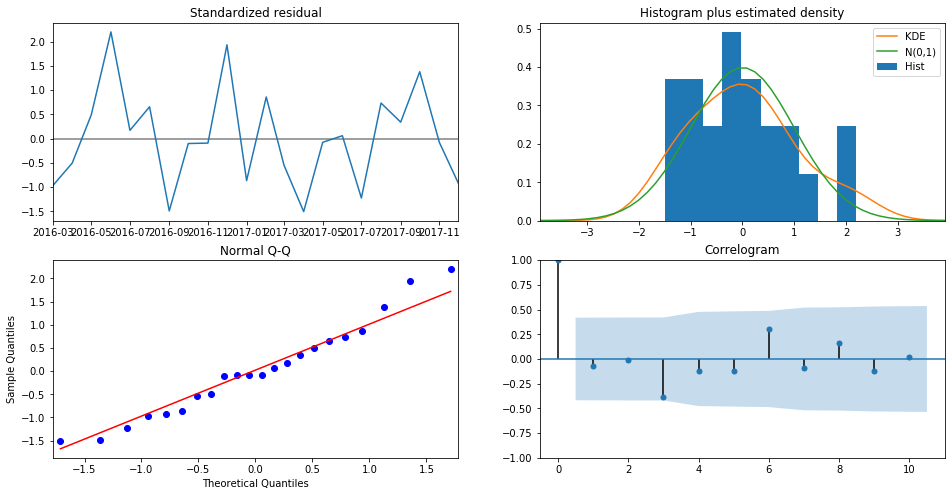

In [28]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [29]:
# It is not perfect, however, our model diagnostics suggests that 
# the model residuals are near normally distributed.

### Validating Forecasts

In [30]:
# Compare the predicted sales to real sales of the time series to 
# understand the accuracy, and we
# set forecasts to start at 2017-01-01 to the end of the  data.

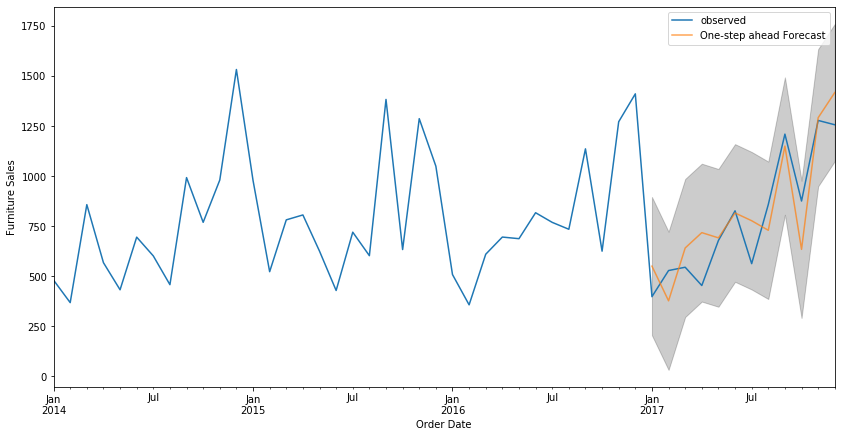

In [31]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], color='k', alpha=0.2)


ax.set_label('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [32]:
y_forcasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_forcasted - y_truth)**2).mean()
print('MSE : ', round(mse,2))

MSE :  22993.57


In [33]:
print('RMSE: ', round(np.sqrt(mse),2))

RMSE:  151.64


#### Producing and visualizing forecast

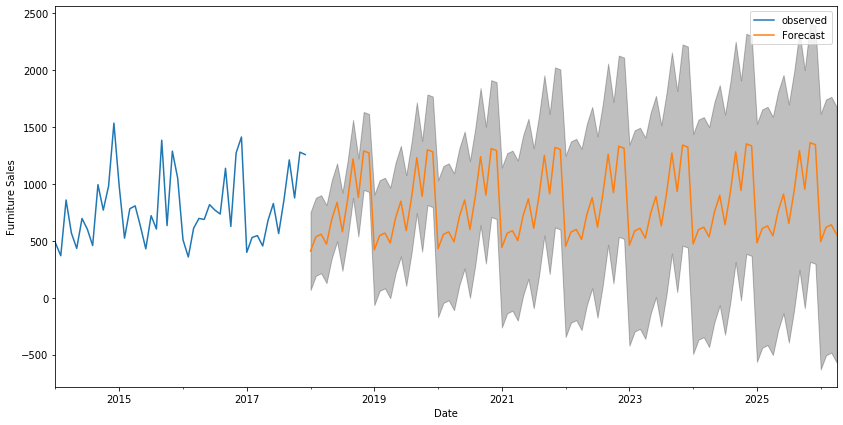

In [34]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:, 1],
               color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

#### Compare Time Series of Furniture vs. Office Supplies

In [35]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

### Data Exploration

In [36]:
furniture = furniture.filter(['Order Date', 'Sales'])
office = office.filter(['Order Date', 'Sales'])
furniture.shape, office.shape

((2121, 2), (6026, 2))

In [37]:
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

In [38]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date').sum().reset_index()

In [39]:
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

In [40]:
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

In [41]:
furniture = pd.DataFrame({'Order Date':y_furniture.index, 
                         'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date':y_office.index,
                      'Sales':y_office.values})

In [42]:
furniture.head()

,Order Date,Sales
0,2014-01-01,480.194231
1,2014-02-01,367.931600
2,2014-03-01,857.291529
3,2014-04-01,567.488357
4,2014-05-01,432.049188


In [43]:
office.head()

,Order Date,Sales
0,2014-01-01,285.357647
1,2014-02-01,63.042588
2,2014-03-01,391.176318
3,2014-04-01,464.794750
4,2014-05-01,324.346545


In [44]:
store = furniture.merge(office, how='inner', on='Order Date', )
store.rename(columns={'Sales_x':'furniture_sales', 'Sales_y':'office_sales'}, inplace=True)

In [45]:
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


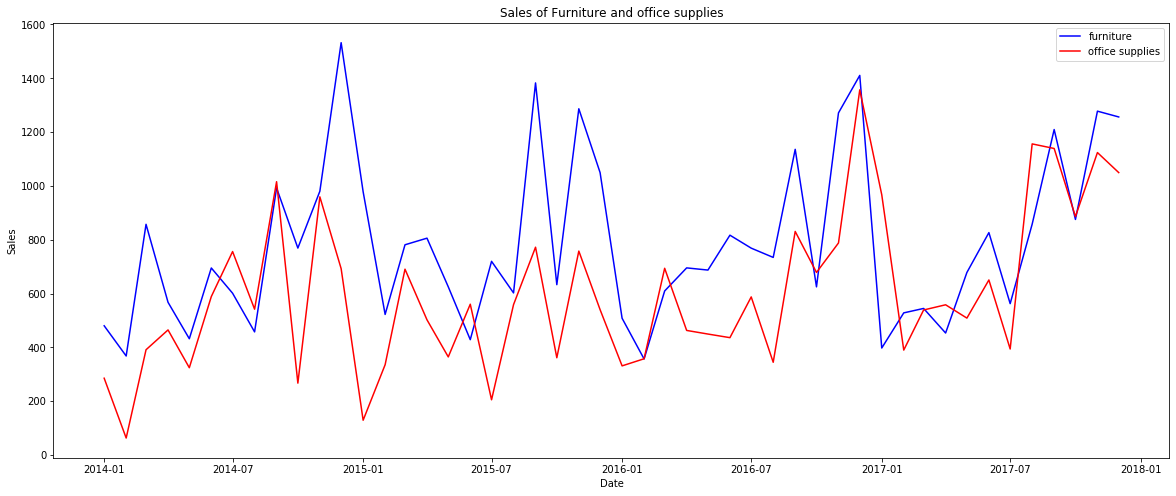

In [46]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label='furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of Furniture and office supplies')
plt.legend()

In [47]:
# Lets find out when was the first time office
# supplies sales surpassed those of furniture.

In [48]:
first_date = store.ix[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))

Office supplies first time produced higher sales than furniture is 2014-07-01.


### Time Series Modeling with Prophet

In [50]:
from fbprophet import Prophet

In [53]:
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales':'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
office = office.rename(columns={'Order Date':'ds', 'Sales':'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

In [57]:
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)

Text(0.5, 1, 'Furniture Sales')

<Figure size 1296x432 with 0 Axes>

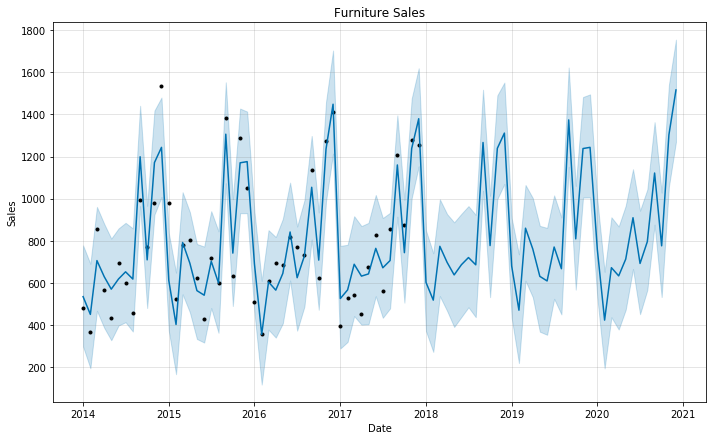

In [58]:
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel='Date', ylabel='Sales')
plt.title('Furniture Sales')

Text(0.5, 1, 'Office Supplies Sales')

<Figure size 1296x432 with 0 Axes>

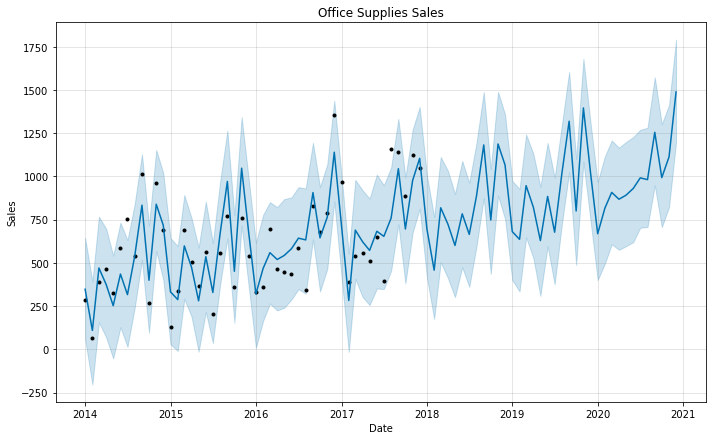

In [59]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel='Date', ylabel='Sales')
plt.title('Office Supplies Sales')

#### Compare Forecasts

In [60]:
# We will join the forecast of two categories together to compare
# their future forecast.

In [61]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]

In [62]:
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()

In [63]:
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names

In [75]:
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how='inner', left_on='furniture_ds',right_on='office_ds')
forecast = forecast.rename(columns={'furniture_ds':'Date'}).drop('office_ds', axis=1)
forecast.head()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.057713,298.329756,778.429690,726.057713,726.057713,-190.685662,-190.685662,-190.685662,-190.685662,...,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,347.490278
1,2014-02-01,727.494023,195.822780,691.230470,727.494023,727.494023,-276.377703,-276.377703,-276.377703,-276.377703,...,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,109.240162
2,2014-03-01,728.791335,467.851295,961.122672,728.791335,728.791335,-22.389755,-22.389755,-22.389755,-22.389755,...,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,470.211349
3,2014-04-01,730.227645,387.572455,880.424311,730.227645,730.227645,-100.141158,-100.141158,-100.141158,-100.141158,...,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,374.687188
4,2014-05-01,731.617622,328.649223,810.753172,731.617622,731.617622,-160.815662,-160.815662,-160.815662,-160.815662,...,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,252.306682


### Trend and Forecast Visualization

Text(0.5, 1.0, 'Furniture vs. Office Supplies Sales Trend')

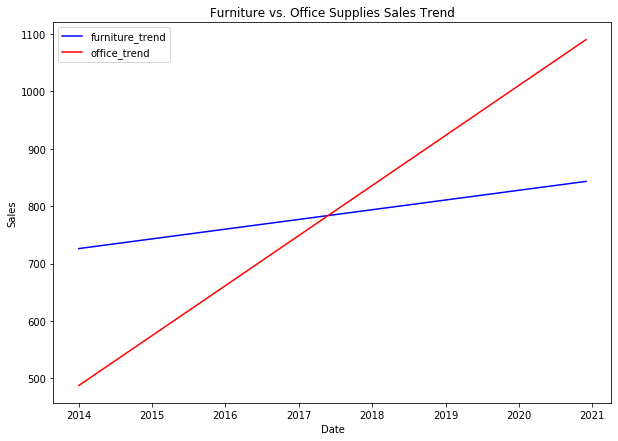

In [76]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-', label='furniture_trend')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-', label='office_trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title('Furniture vs. Office Supplies Sales Trend')

Text(0.5, 1.0, 'Furniture vs. Office Supplies Sales Trend')

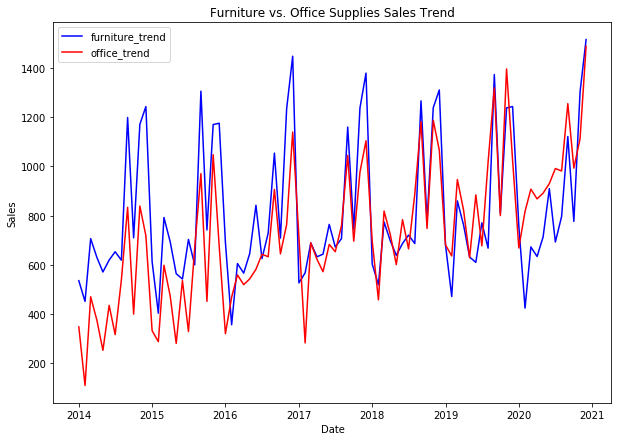

In [77]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-', label='furniture_trend')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-', label='office_trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title('Furniture vs. Office Supplies Sales Trend')

### Trends and Patterns

In [69]:
# Now, we can use the Prophet Models to inspect different 
# trend of these two categories in the data.

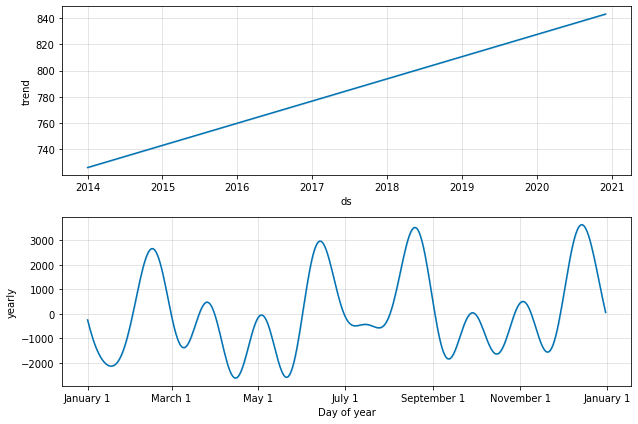

In [78]:
furniture_model.plot_components(furniture_forecast);

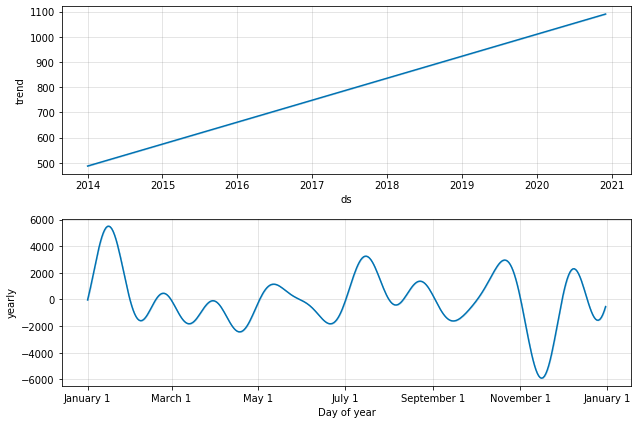

In [79]:
office_model.plot_components(office_forecast);